In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# looping through the netcdf files in era5_data folder
df = pd.read_csv('cloud_data.csv')
for nc in os.listdir('era5_data'):
    nc = os.path.join('era5_data', nc)
    ds = xr.open_dataset(nc)
    # calculate the mean temperature 
    mean_t = ds['t'].mean()
    # coveriting to Celsius
    mean_t = mean_t - 273.15
    print(f'{mean_t.values:.2f} Celsius')

    # using pitagoras theorem to calculate the wind speed from u and v components
    wind_speed = np.sqrt(ds['u']**2 + ds['v']**2)
    # calculating the mean wind speed
    mean_wind_speed = wind_speed.mean()
    print(f'mean wind speed: {mean_wind_speed.values:.2f} m/s')

    # calculating the mean wind direction
    mean_wind_direction = np.arctan2(ds['v'], ds['u']).mean()
    print(f'mean wind direction (radian): {mean_wind_direction.values:.2f} rad')

    # converting the wind direction to degrees
    mean_wind_direction = np.rad2deg(mean_wind_direction)
    print(f'mean wind direction (degrees):{mean_wind_direction.values:.2f} degrees')

    index = nc.split('\\')[1].split('.')[0] # This way we make sure that the index is the same as the name in the 'cloud_data.csv' file
    # Importent to note that this split method is only valid for windows, for linux or mac you should use '/' instead of '\\'

    # adding the mean temperature, mean wind speed and mean direction to the the 'cloud_data.csv' file based on the index
    df.loc[df['name'] == index, 'mean_temperature'] = mean_t.values
    df.loc[df['name'] == index, 'mean_wind_speed'] = mean_wind_speed.values
    df.loc[df['name'] == index, 'mean_wind_direction'] = mean_wind_direction.values

# saving the updated 'cloud_data.csv' file
df.to_csv('cloud_data.csv', index=False)

df




19.39 Celsius
mean wind speed: 9.55 m/s
mean wind direction (radian): 2.50 rad
mean wind direction (degrees):143.22 degrees
18.79 Celsius
mean wind speed: 10.20 m/s
mean wind direction (radian): 2.52 rad
mean wind direction (degrees):144.37 degrees
19.03 Celsius
mean wind speed: 10.25 m/s
mean wind direction (radian): 2.58 rad
mean wind direction (degrees):147.55 degrees


,name,year,month,day,minlat,maxlat,minlon,maxlon,clouds_num,avg_size,mean_temperature,mean_wind_speed,mean_wind_direction
0,20190801-10-9-93-92,2019,8,1,-10,-9,-93,-92,36,74.56250,19.392206,9.545710,143.224686
1,20190801-11-10-93-92,2019,8,1,-11,-10,-93,-92,30,124.68750,18.789850,10.200725,144.374466
2,20190801-11-10-94-93,2019,8,1,-11,-10,-94,-93,22,168.50000,19.028528,10.253119,147.554977
3,20190801-11-10-95-94,2019,8,1,-11,-10,-95,-94,19,293.28125,19.343469,10.229515,150.729490
4,20190801-12-11-92-91,2019,8,1,-12,-11,-92,-91,21,223.50000,17.997827,10.570037,144.306140
5,20190801-12-11-93-92,2019,8,1,-12,-11,-93,-92,12,563.40625,18.337427,10.576790,147.374710
6,20190801-12-11-94-93,2019,8,1,-12,-11,-94,-93,25,174.87500,18.708063,10.591484,150.779300
7,20190801-12-11-95-94,2019,8,1,-12,-11,-95,-94,41,126.75000,19.098993,10.571181,153.446170
8,20190801-13-12-92-91,2019,8,1,-13,-12,-92,-91,10,584.31250,17.623529,11.129586,148.122730
9,20190801-13-12-93-92,2019,8,1,-13,-12,-93,-92,8,336.31250,17.962976,11.083296,150.508240


The wind speed is calculated from the u and v components.  
The wind direction is reletive to the north (0 degrees)

In [3]:
nc = os.listdir('era5_data')[0]
print(nc)
nc = os.path.join('era5_data', nc)
ds = xr.open_dataset(nc)
ds

20190801-10-9-93-92.nc


<xarray.Dataset>
Dimensions:         (valid_time: 1, pressure_level: 1, latitude: 5, longitude: 5)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 2019-08-01T13:00:00
  * pressure_level  (pressure_level) float64 1e+03
  * latitude        (latitude) float64 -9.0 -9.25 -9.5 -9.75 -10.0
  * longitude       (longitude) float64 -93.0 -92.75 -92.5 -92.25 -92.0
Data variables:
    number          int64 ...
    expver          object ...
    t               (valid_time, pressure_level, latitude, longitude) float32 ...
    u               (valid_time, pressure_level, latitude, longitude) float32 ...
    v               (valid_time, pressure_level, latitude, longitude) float32 ...
    r               (valid_time, pressure_level, latitude, longitude) float32 ...
    w               (valid_time, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-30T12:23 GRIB to CDM+CF via cfgrib-0.9.1...

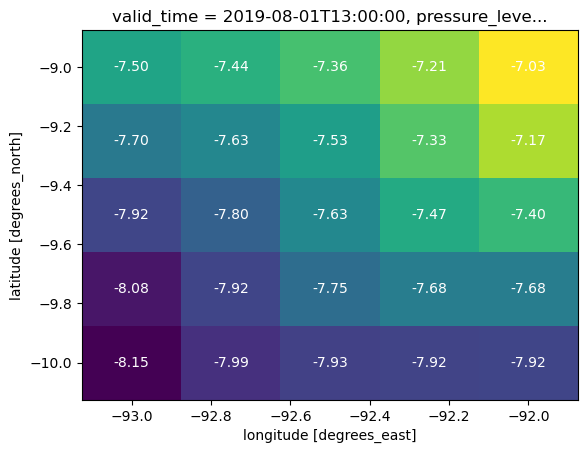

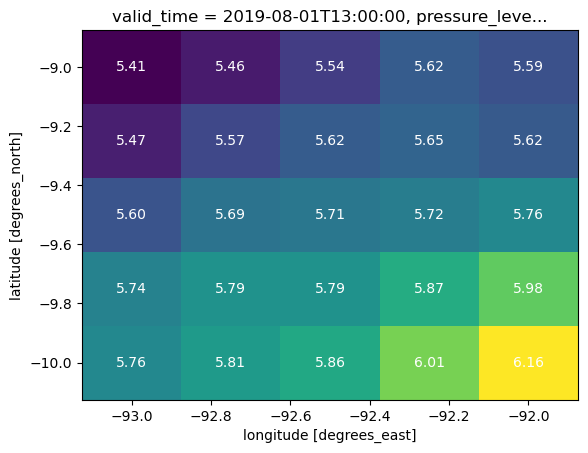

In [4]:
# Plot the u component
plt.figure()
u_component = ds['u'].isel(valid_time=0, pressure_level=0)
u_component.plot(cmap='viridis', add_colorbar=False)

# Annotate the values on the plot
latitudes = u_component['latitude'].values
longitudes = u_component['longitude'].values
for i, lat in enumerate(latitudes):
    for j, lon in enumerate(longitudes):
        value = u_component.sel(latitude=lat, longitude=lon).values
        plt.text(lon, lat, f'{value:.2f}', color='white', ha='center', va='center')

plt.show()


# Plot the v component
plt.figure()
u_component = ds['v'].isel(valid_time=0, pressure_level=0)
u_component.plot(cmap='viridis', add_colorbar=False)

# Annotate the values on the plot
latitudes = u_component['latitude'].values
longitudes = u_component['longitude'].values
for i, lat in enumerate(latitudes):
    for j, lon in enumerate(longitudes):
        value = u_component.sel(latitude=lat, longitude=lon).values
        plt.text(lon, lat, f'{value:.2f}', color='white', ha='center', va='center')

plt.show()




In [5]:
# using pitagoras theorem to calculate the wind speed from u and v components
wind_speed = np.sqrt(ds['u']**2 + ds['v']**2)
# calculating the mean wind speed
mean_wind_speed = wind_speed.mean()
print(f'mean wind speed: {mean_wind_speed.values:.2f} m/s')

# calculating the mean wind direction
mean_wind_direction = np.arctan2(ds['v'], ds['u']).mean()
print(f'mean wind direction (radian): {mean_wind_direction.values:.2f} rad')

# converting the wind direction to degrees
mean_wind_direction = np.rad2deg(mean_wind_direction)
print(f'mean wind direction (degrees):{mean_wind_direction.values:.2f} degrees')




mean wind speed: 9.55 m/s
mean wind direction (radian): 2.50 rad
mean wind direction (degrees):143.22 degrees


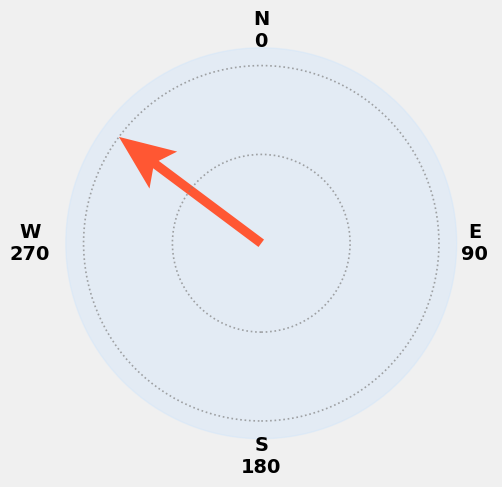

In [6]:
# Convert wind direction to radians (polar coordinate system)
theta = np.radians(mean_wind_direction) 

# Define arrow properties
arrow_x = np.cos(theta) * mean_wind_speed
arrow_y = np.sin(theta) * mean_wind_speed

# Create figure
fig, ax = plt.subplots(figsize=(6, 6), facecolor='#f0f0f0')  # Light gray background

# Draw gradient background
ax.set_facecolor('#e8f4fc')  # Light blue
circle_bg = plt.Circle((0, 0), mean_wind_speed * 1.1, color='#c6e2ff', alpha=0.3)  
ax.add_patch(circle_bg)

# Draw wind arrow
ax.quiver(0, 0, arrow_x, arrow_y, angles='xy', scale_units='xy', scale=1, 
          color='#ff5733', width=0.02, headwidth=5, headlength=6, headaxislength=5)

# Draw reference circles
for r in [mean_wind_speed * 0.5, mean_wind_speed * 1.0]:  
    ax.add_patch(plt.Circle((0, 0), r, color='gray', fill=False, linestyle='dotted', linewidth=1.2, alpha=0.7))

# Add labels
ax.text(0, mean_wind_speed * 1.2, 'N\n0', ha='center', va='center', fontsize=14, fontweight='bold', color='black')
ax.text(mean_wind_speed * 1.2, 0, 'E\n90', ha='center', va='center', fontsize=14, fontweight='bold', color='black')
ax.text(0, -mean_wind_speed * 1.2, 'S\n180', ha='center', va='center', fontsize=14, fontweight='bold', color='black')
ax.text(-mean_wind_speed * 1.3, 0, 'W\n270', ha='center', va='center', fontsize=14, fontweight='bold', color='black')


# Remove ticks & frame for a cleaner look
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_xlim(-mean_wind_speed * 1.3, mean_wind_speed * 1.3)
ax.set_ylim(-mean_wind_speed * 1.3, mean_wind_speed * 1.3)
ax.set_aspect('equal')

plt.show()

In [7]:
import pandas as pd

index = file_name.split('/')[1].split('.')[0]
df = pd.read_csv('cloud_data.csv')

# adding the mean temperature, mean wind speed and mean direction to the the 'cloud_data.csv' file based on the index
df.loc[index, 'mean_temperature'] = mean_t.values
df.loc[index, 'mean_wind_speed'] = mean_wind_speed.values
df.loc[index, 'mean_wind_direction'] = mean_wind_direction.values

df




NameError: name 'file_name' is not defined